<a href="https://colab.research.google.com/github/mizscrystal/Sales-Data/blob/main/Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading of necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from pathlib import Path
import math
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
dataset = files.upload()
# Reading the dataset from Colab Local Repository
dataset = pd.read_excel('UXDI _ Data Analyst Practical.xlsx')

Saving UXDI _ Data Analyst Practical.xlsx to UXDI _ Data Analyst Practical (1).xlsx


In [ ]:
dataset_sheet_cost = pd.read_excel('UXDI _ Data Analyst Practical.xlsx', sheet_name='Cost')
dataset_sheet_dataset2 = pd.read_excel('UXDI _ Data Analyst Practical.xlsx', sheet_name='Data set 1')

In [ ]:
dataset_sheet_cost.head()

,Month,Country/Territory (Geographic),Cost,Channel
0,2022-01-01,Canada,120.86,Google Ads
1,2022-01-01,Ireland,59.73,Google Ads
2,2022-01-01,United Kingdom,156.21,Google Ads
3,2022-01-01,United States,23.55,Google Ads
4,2022-01-01,Australia,11.90,Google Ads


In [ ]:
dataset_sheet_dataset2.head()

,Channel Source,Create Date,Country/Region,Diploma | Purchase date,Diploma converted | Euro amount
0,Other,2022-02-07 09:41:00,United Kingdom,2022-02-21,2974.44
1,Direct | Traffic,2022-01-27 17:00:00,United Kingdom,2022-02-01,2903.35
2,Google | Paid Search,2022-02-07 14:46:00,United Kingdom,2022-02-17,2903.49
3,Google | Paid Search,2022-03-23 16:05:00,United Kingdom,NaT,NaN
4,Other,2022-01-09 17:20:00,United Kingdom,2022-01-31,2406.52


Perfroming Exploratory data Analysis (EDA) and vitualisation

In [ ]:
dataset_sheet_dataset2.describe()

,Diploma converted | Euro amount
count,594.000000
mean,3063.143805
std,452.796528
min,1750.000000
25%,2927.687500
50%,2950.000000
75%,2969.765000
max,4893.000000


In [ ]:
print('Dimensions of the Test set:',dataset_sheet_dataset2.shape)

Dimensions of the Test set: (4778, 5)


<Figure size 1440x1440 with 0 Axes>

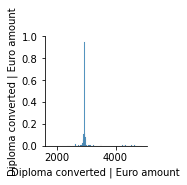

In [ ]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(dataset_sheet_dataset2);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


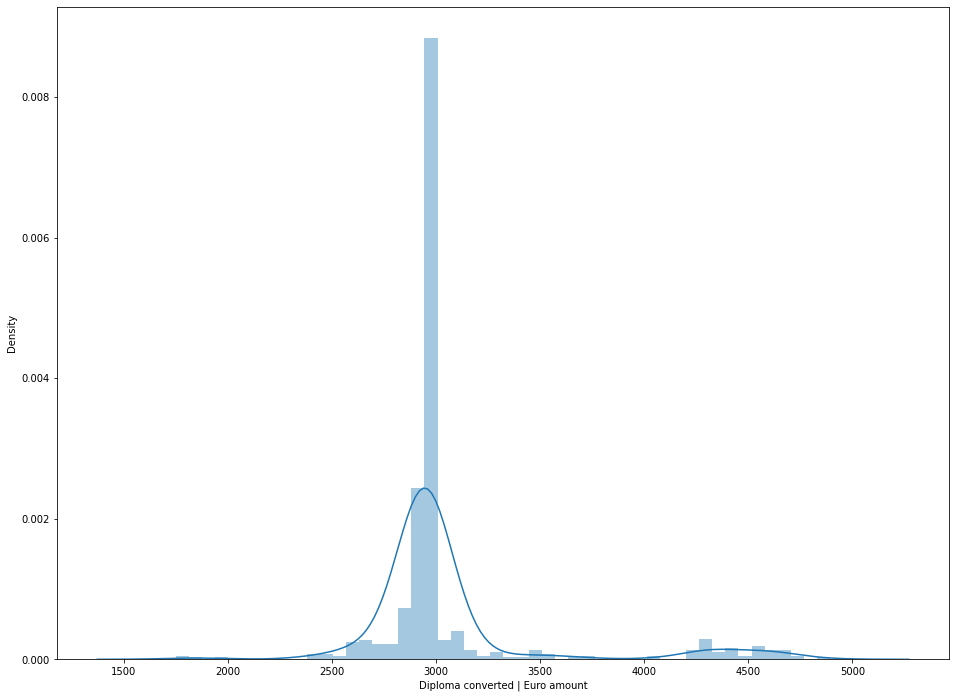

In [ ]:
fig = plt.figure(figsize=(16,12))
sns.distplot(dataset_sheet_dataset2['Diploma converted | Euro amount']);
plt.show()

In [ ]:
# We check for null value
dataset_sheet_dataset2.isnull().sum()

Channel Source                        0
Create Date                           0
Country/Region                       17
Diploma | Purchase date            4184
Diploma converted | Euro amount    4184
dtype: int64

From the data, we can see that three columns out of the five colums containes missing value. The most common way of dealing with missing values is deleting them. But before we proceed, lets check the percentage of missing values if it is insignificant enough for deletion. 

In [ ]:
#we will first check the percentage of missing values and decide the best way to handle it.
#First we examine the feature with missing values
# Calculate missing percent value from whole dataset
total_null = dataset_sheet_dataset2.isnull().sum()
percent_null = (total_null/(dataset_sheet_dataset2.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                 Total    Percent
Channel Source                       0   0.000000
Create Date                          0   0.000000
Country/Region                      17   0.355797
Diploma | Purchase date           4184  87.568020
Diploma converted | Euro amount   4184  87.568020


In [ ]:
dataset_sheet_dataset3 = dataset_sheet_dataset2.dropna()
total_null_1 = dataset_sheet_dataset3.isnull().sum()
percent_null_1 = (total_null_1/(dataset_sheet_dataset2.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)

                                 Total  Percent
Channel Source                       0      0.0
Create Date                          0      0.0
Country/Region                       0      0.0
Diploma | Purchase date              0      0.0
Diploma converted | Euro amount      0      0.0


In [ ]:
dataset_sheet_dataset3.head()


,Channel Source,Create Date,Country/Region,Diploma | Purchase date,Diploma converted | Euro amount
0,Other,2022-02-07 09:41:00,United Kingdom,2022-02-21,2974.44
1,Direct | Traffic,2022-01-27 17:00:00,United Kingdom,2022-02-01,2903.35
2,Google | Paid Search,2022-02-07 14:46:00,United Kingdom,2022-02-17,2903.49
4,Other,2022-01-09 17:20:00,United Kingdom,2022-01-31,2406.52
5,Google | Organic Search,2022-02-02 14:36:00,Germany,2022-02-25,2950.00


In [ ]:
dataset_sheet_dataset3['Create_Month_Year'] = dataset_sheet_dataset3['Create Date'].dt.to_period('M')
dataset_sheet_dataset3['Purchase_month_Year'] = dataset_sheet_dataset3['Diploma | Purchase date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset_sheet_dataset3.head(5)

,Channel Source,Create Date,Country/Region,Diploma | Purchase date,Diploma converted | Euro amount,Create_Month_Year,Purchase_month_Year
0,Other,2022-02-07 09:41:00,United Kingdom,2022-02-21,2974.44,2022-02,2022-02
1,Direct | Traffic,2022-01-27 17:00:00,United Kingdom,2022-02-01,2903.35,2022-01,2022-02
2,Google | Paid Search,2022-02-07 14:46:00,United Kingdom,2022-02-17,2903.49,2022-02,2022-02
4,Other,2022-01-09 17:20:00,United Kingdom,2022-01-31,2406.52,2022-01,2022-01
5,Google | Organic Search,2022-02-02 14:36:00,Germany,2022-02-25,2950.00,2022-02,2022-02


In [ ]:
comparison_column = np.where(dataset_sheet_dataset3["Create_Month_Year"] == dataset_sheet_dataset3["Purchase_month_Year"], True, False)

In [ ]:
dataset_sheet_dataset3.head(5)


,Channel Source,Create Date,Country/Region,Diploma | Purchase date,Diploma converted | Euro amount,Create_Month_Year,Purchase_month_Year
0,Other,2022-02-07 09:41:00,United Kingdom,2022-02-21,2974.44,2022-02,2022-02
1,Direct | Traffic,2022-01-27 17:00:00,United Kingdom,2022-02-01,2903.35,2022-01,2022-02
2,Google | Paid Search,2022-02-07 14:46:00,United Kingdom,2022-02-17,2903.49,2022-02,2022-02
4,Other,2022-01-09 17:20:00,United Kingdom,2022-01-31,2406.52,2022-01,2022-01
5,Google | Organic Search,2022-02-02 14:36:00,Germany,2022-02-25,2950.00,2022-02,2022-02


In [ ]:
dataset_sheet_dataset3['New'] = dataset_sheet_dataset3.apply(lambda x: x['Create_Month_Year'] if x['Create_Month_Year'] ==
                     x['Purchase_month_Year'] else np.nan, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# printing the dataframe
dataset_sheet_dataset3.head(5)

,Channel Source,Create Date,Country/Region,Diploma | Purchase date,Diploma converted | Euro amount,Create_Month_Year,Purchase_month_Year,New
0,Other,2022-02-07 09:41:00,United Kingdom,2022-02-21,2974.44,2022-02,2022-02,2022-02
1,Direct | Traffic,2022-01-27 17:00:00,United Kingdom,2022-02-01,2903.35,2022-01,2022-02,NaT
2,Google | Paid Search,2022-02-07 14:46:00,United Kingdom,2022-02-17,2903.49,2022-02,2022-02,2022-02
4,Other,2022-01-09 17:20:00,United Kingdom,2022-01-31,2406.52,2022-01,2022-01,2022-01
5,Google | Organic Search,2022-02-02 14:36:00,Germany,2022-02-25,2950.00,2022-02,2022-02,2022-02


In [ ]:
#What percentage of leads register and make a purchase in the same month?
total_null = dataset_sheet_dataset3['New'].notnull().sum()
percent_null = (total_null/(dataset_sheet_dataset3['New'].notnull().count())) * 100
print(percent_null)

77.74030354131534


Google | Paid Search         352
Direct | Traffic              81
Google | Organic Search       74
Other                         39
Referral | Traffic            27
Facebook | Paid Social        10
Bing | Paid Search             5
Facebook | Organic Social      2
Internal Blog Traffic          1
Email | Sales                  1
LinkedIn | Organic Social      1
Name: Channel Source, dtype: int64

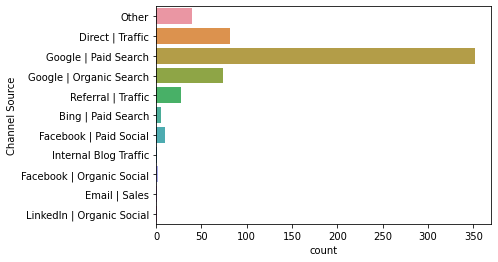

In [ ]:
#What channel has the highest Lead to Sale conversion rate?
#dataset_sheet_dataset3['Channel Source'].count
# Printing all data type and their unique values
sns.countplot(y = 'Channel Source', data = dataset_sheet_dataset3 )
dataset_sheet_dataset3['Channel Source'].value_counts()

In [ ]:
#Which is the most profitable channel?
profit = dataset_sheet_dataset3.groupby('Channel Source').sum()
profit

,Diploma converted | Euro amount
Channel Source,
Bing | Paid Search,15518.53
Direct | Traffic,242141.09
Email | Sales,2869.61
Facebook | Organic Social,5738.50
Facebook | Paid Social,33899.90
Google | Organic Search,220783.10
Google | Paid Search,1073785.74
Internal Blog Traffic,2950.00
LinkedIn | Organic Social,1800.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


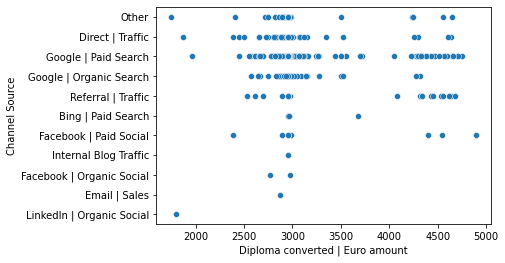

In [ ]:
sns.scatterplot(dataset_sheet_dataset3['Diploma converted | Euro amount'], dataset_sheet_dataset3['Channel Source'])

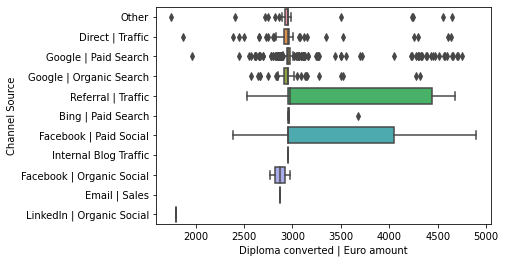

In [ ]:
sns.boxplot(x=dataset_sheet_dataset3['Diploma converted | Euro amount'], y=dataset_sheet_dataset3['Channel Source'])

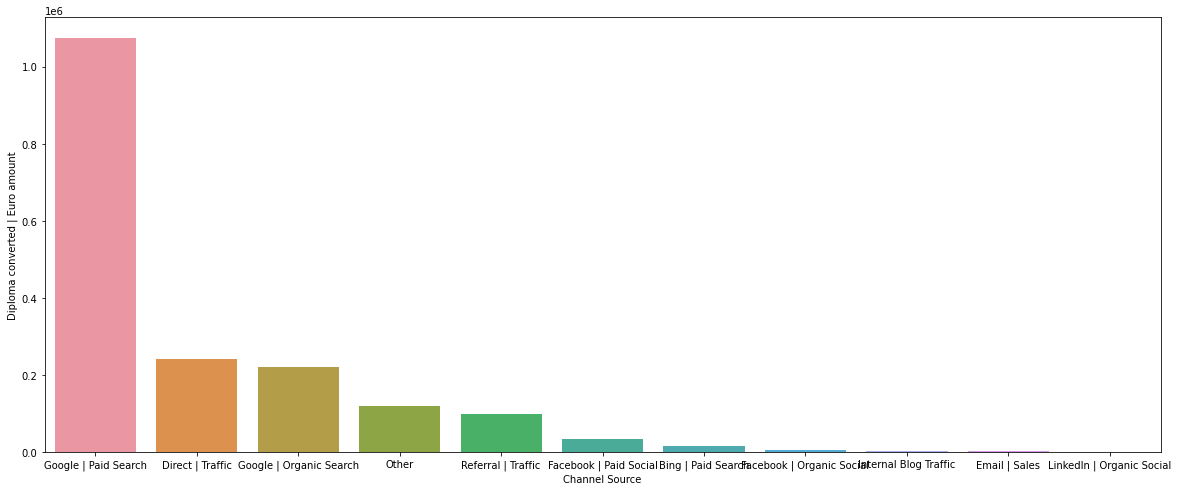

In [ ]:
cat=dataset_sheet_dataset3[["Channel Source", "Diploma converted | Euro amount"]].groupby(['Channel Source'], as_index=False).sum().sort_values(by='Diploma converted | Euro amount', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Channel Source', y='Diploma converted | Euro amount', data=cat)

In [ ]:
#dataset_sheet_dataset3['Channel Source'].value_counts().sort_values(ascending=False)

Google | Paid Search         352
Direct | Traffic              81
Google | Organic Search       74
Other                         39
Referral | Traffic            27
Facebook | Paid Social        10
Bing | Paid Search             5
Facebook | Organic Social      2
Internal Blog Traffic          1
Email | Sales                  1
LinkedIn | Organic Social      1
Name: Channel Source, dtype: int64

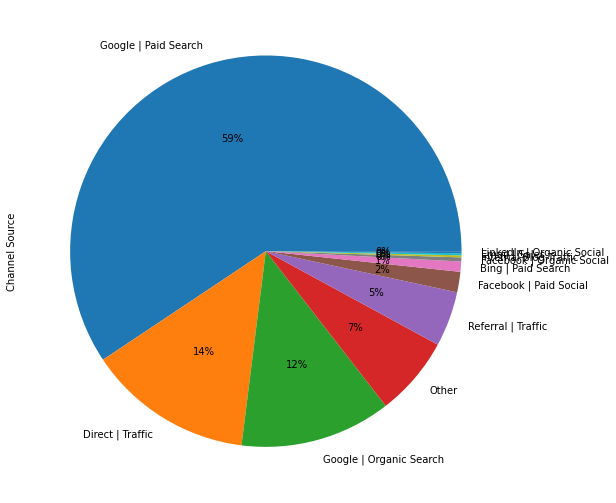

In [ ]:
plt.figure(figsize=(9,9))
dataset_sheet_dataset3['Channel Source'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(dataset_sheet_dataset3['Channel Source'].value_counts().sort_values(ascending=False).index))
plt.show()

In [ ]:
#What would you suggest as the best was to split a €100,000 budget between channels to bring in the highest revenue?
income = dataset_sheet_dataset3['Diploma converted | Euro amount'].sum()
profit = dataset_sheet_dataset3.groupby('Channel Source').sum()
percent = (profit/income) * 100
print(percent)

                           Diploma converted | Euro amount
Channel Source                                            
Bing | Paid Search                                0.854282
Direct | Traffic                                 13.329669
Email | Sales                                     0.157970
Facebook | Organic Social                         0.315900
Facebook | Paid Social                            1.866162
Google | Organic Search                          12.153929
Google | Paid Search                             59.111027
Internal Blog Traffic                             0.162395
LinkedIn | Organic Social                         0.099089
Other                                             6.549043
Referral | Traffic                                5.400536
